### WDNN model

pass the requirement for n=9,12,15,18,24

Run multiple times with error bar possible

In [69]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2

# Set a global seed for reproducibility
def set_global_seed(seed_value):
    import os
    import random
    import numpy as np
    import tensorflow as tf
    
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

def lr_scheduler(epoch, lr):
    initial_lr = 0.001  # This should match your initial learning rate in the optimizer
    if epoch > 50:
        return lr * 0.5  # Keep half of the initial learning rate
    return initial_lr

def run_wide_and_deep_model(n,seed):
    # Load dataset
    X = np.load(f'Datasets/kryptonite-{n}-X.npy') 
    y = np.load(f'Datasets/kryptonite-{n}-y.npy')
    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Define the input for both wide and deep parts
    input_layer = Input(shape=(X_train_scaled.shape[1],), name="input_layer")

    # Wide part: Linear layer
    wide_part = Dense(256, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
    wide_part = BatchNormalization()(wide_part)

    # Deep part: Multi-layer perceptron
    deep_part = Dense(256, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
    deep_part = BatchNormalization()(deep_part)
    deep_part = Dropout(0.2)(deep_part)
    deep_part = Dense(128, activation="relu", kernel_regularizer=l2(0.001))(deep_part)
    deep_part = BatchNormalization()(deep_part)
    deep_part = Dropout(0.2)(deep_part)
    deep_part = Dense(64, activation="relu", kernel_regularizer=l2(0.001))(deep_part)
    deep_part = BatchNormalization()(deep_part)

    # Concatenate wide and deep parts
    combined = Concatenate()([wide_part, deep_part])

    # Output layer
    output = Dense(1, activation="sigmoid")(combined)

    # Define the model
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

    # Callbacks for early stopping and learning rate adjustment
    early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
    lr_callback = LearningRateScheduler(lr_scheduler)

    # Train the model
    history = model.fit(
        X_train_scaled,
        y_train,
        epochs=100,
        batch_size=64,
        validation_data=(X_val_scaled, y_val),
        callbacks=[early_stopping, lr_callback],
        verbose=1,
    )

    # Save the trained model
    model.save(f"models/model_kryptonite_{n}_{seed}.keras")
    print(f"Model saved")

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy


# Example usage for specific n values
possible_n_vals = [9, 12, 15, 18]  # Test on n=24 or other values
SEEDS = [40, 42, 44]
acc_list = {seed: [] for seed in SEEDS}  # Initialize dictionary with empty lists for each seed

for seed in SEEDS:
    # Set a global seed for reproducibility
    set_global_seed(seed)
    for n in possible_n_vals:
        print(f"Testing with n={n} and SEED={seed}")
        accuracy = run_wide_and_deep_model(n, seed)
        acc_list[seed].append(accuracy)  # Append accuracy to the corresponding seed's list

# Print the results
for seed, accuracies in acc_list.items():
    for idx, accuracy in enumerate(accuracies):
        print(f"Accuracy achieved for SEED {seed}: {accuracy} with n={possible_n_vals[idx]}")


Testing with n=9 and SEED=40
Epoch 1/100
113/113 [==============================] - 3s 8ms/step - loss: 0.9757 - accuracy: 0.5682 - val_loss: 0.9310 - val_accuracy: 0.5941 - lr: 0.0010
Epoch 2/100
113/113 [==============================] - 1s 6ms/step - loss: 0.7846 - accuracy: 0.7776 - val_loss: 0.8083 - val_accuracy: 0.8424 - lr: 0.0010
Epoch 3/100
113/113 [==============================] - 1s 7ms/step - loss: 0.5968 - accuracy: 0.9022 - val_loss: 0.6012 - val_accuracy: 0.9394 - lr: 0.0010
Epoch 4/100
113/113 [==============================] - 1s 6ms/step - loss: 0.4678 - accuracy: 0.9326 - val_loss: 0.4313 - val_accuracy: 0.9565 - lr: 0.0010
Epoch 5/100
113/113 [==============================] - 1s 6ms/step - loss: 0.4040 - accuracy: 0.9379 - val_loss: 0.3723 - val_accuracy: 0.9557 - lr: 0.0010
Epoch 6/100
113/113 [==============================] - 1s 6ms/step - loss: 0.3687 - accuracy: 0.9451 - val_loss: 0.3395 - val_accuracy: 0.9570 - lr: 0.0010
Epoch 7/100
113/113 [==============

In [70]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2

def set_global_seed(seed_value):
    import os
    import random
    import numpy as np
    import tensorflow as tf
    
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

def lr_scheduler(epoch, lr):
    initial_lr = 0.0005  # This should match your initial learning rate in the optimizer
    if epoch > 50:
        return initial_lr * 0.5  # Keep half of the initial learning rate
    return initial_lr

def run_wide_and_deep_model(n, seed):
    # Load dataset
    X = np.load(f'Datasets/additional-kryptonite-{n}-X.npy') 
    y = np.load(f'Datasets/additional-kryptonite-{n}-y.npy')

    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Define the input for both wide and deep parts
    input_layer = Input(shape=(X_train.shape[1],), name="input_layer")

    # Wide part: Linear layer
    wide_part = Dense(256, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
    wide_part = BatchNormalization()(wide_part)

    # Deep part: Multi-layer perceptron
    deep_part = Dense(256, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
    deep_part = BatchNormalization()(deep_part)
    deep_part = Dropout(0.2)(deep_part)
    deep_part = Dense(128, activation="relu", kernel_regularizer=l2(0.001))(deep_part)
    deep_part = BatchNormalization()(deep_part)
    deep_part = Dropout(0.2)(deep_part)
    deep_part = Dense(64, activation="relu", kernel_regularizer=l2(0.001))(deep_part)
    deep_part = BatchNormalization()(deep_part)

    # Concatenate wide and deep parts
    combined = Concatenate()([wide_part, deep_part])

    # Output layer
    output = Dense(1, activation="sigmoid")(combined)

    # Define the model
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0005), loss="binary_crossentropy", metrics=["accuracy"])

    # Callbacks for early stopping and learning rate adjustment
    early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
    lr_callback = LearningRateScheduler(lr_scheduler)

    # Train the model
    history = model.fit(
        X_train_scaled,
        y_train,
        epochs=100,
        batch_size=64,
        validation_data=(X_val_scaled, y_val),
        callbacks=[early_stopping, lr_callback],
        verbose=1,
    )

    # Save the trained model
    model.save(f"models/model_kryptonite_{n}_{seed}.keras")
    print(f"Model saved")

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy

# Example usage for specific n values
possible_n_vals = [24]  # Test on n=24 or other values
SEEDS = [40, 42, 44]
acc_list = {seed: [] for seed in SEEDS}  # Initialize dictionary with empty lists for each seed

for seed in SEEDS:
    # Set a global seed for reproducibility
    set_global_seed(seed)
    for n in possible_n_vals:
        print(f"Testing with n={n} and SEED={seed}")
        accuracy = run_wide_and_deep_model(n, seed)
        acc_list[seed].append(accuracy)  # Append accuracy to the corresponding seed's list

# Print the results
for seed, accuracies in acc_list.items():
    for idx, accuracy in enumerate(accuracies):
        print(f"Accuracy achieved for SEED {seed}: {accuracy} with n={possible_n_vals[idx]}")

Testing with n=24 and SEED=40
Epoch 1/100
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9603 - accuracy: 0.5018 - val_loss: 0.8590 - val_accuracy: 0.5013 - lr: 5.0000e-04
Epoch 2/100
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7990 - accuracy: 0.5120 - val_loss: 0.7599 - val_accuracy: 0.5005 - lr: 5.0000e-04
Epoch 3/100
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7347 - accuracy: 0.5155 - val_loss: 0.7272 - val_accuracy: 0.5008 - lr: 5.0000e-04
Epoch 4/100
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7131 - accuracy: 0.5173 - val_loss: 0.7139 - val_accuracy: 0.5026 - lr: 5.0000e-04
Epoch 5/100
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7061 - accuracy: 0.5202 - val_loss: 0.7085 - val_accuracy: 0.5061 - lr: 5.0000e-04
Epoch 6/100
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7023 - accuracy: 0.5242 - val_loss: 0.7035 - val_accuracy: 0.5104 - lr: 5.0

### Testing

not finished

In [45]:
from tensorflow.keras.models import load_model

def testing(n, add):
    if add:
        # Load dataset
        X = np.load(f'Datasets/additional-kryptonite-{n}-X.npy') 
        y = np.load(f'Datasets/additional-kryptonite-{n}-y.npy')
    else:
        # Load dataset
        X = np.load(f'Datasets/kryptonite-{n}-X.npy') 
        y = np.load(f'Datasets/kryptonite-{n}-y.npy')

    # Shuffle and split the data
    _, X_temp, _, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
    _, X_test, _, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test)

    model = load_model(f"models/model_kryptonite_{n}.keras")

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    #print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy

# Example usage for specific n values
acc_list = []
possible_n_vals = {9:0,12:0,15:0,18:0,24:1}
for n, add in possible_n_vals.items():
    print(f"Testing with n={n}")
    accuracy = testing(n, add)
    acc_list.append(accuracy)

for i in range(len(acc_list)):
    print(f"Best accuracy achieved: {acc_list[i]} with n={list(possible_n_vals.keys())[i]}")

Testing with n=9
Testing with n=12
Testing with n=15
Testing with n=18
Testing with n=24
Best accuracy achieved: 0.9614814519882202 with n=9
Best accuracy achieved: 0.957361102104187 with n=12
Best accuracy achieved: 0.941777765750885 with n=15
Best accuracy achieved: 0.9009259343147278 with n=18
Best accuracy achieved: 0.8557466864585876 with n=24


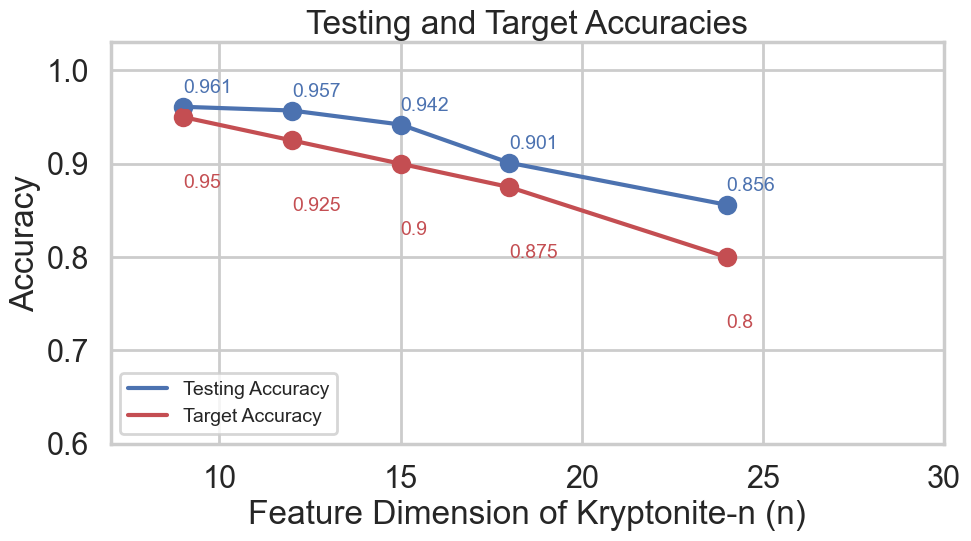

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
n = [9, 12, 15, 18, 24]
acc_list = [round(item, 3) for item in acc_list]  # Example accuracy list
succ = [0.95, 0.925, 0.9, 0.875, 0.8]

# Plot style
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=1)
plt.figure(figsize=(10, 8))

# Plot lines and scatter points
plt.plot(n, acc_list, c='b', label="Testing Accuracy")
plt.scatter(x=n, y=acc_list, c='b')
plt.plot(n, succ, c='r', label="Target Accuracy")
plt.scatter(x=n, y=succ, c='r')

# Add annotations
ax = plt.gca()
for j, (x, y) in enumerate(zip(n, acc_list)):
    ax.text(x, y + 0.03, f'{acc_list[j]}', ha='left', va='top', color='b', size=14)
    ax.text(x, succ[j] - 0.08, f'{succ[j]}', ha='left', va='bottom', color='r', size=14)

# Add legend
plt.legend(loc="lower left", fontsize=14)

# Adjust layout
plt.tight_layout()
plt.ylim((0.6, 1.03))
plt.xlim((7, 30))

# Add title and labels
plt.title("Testing and Target Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Feature Dimension of Kryptonite-n (n)")

# Show the plot
plt.show()


### Material from the paper (Teacher Given)

In [3]:
n_values = [9,12,15]

p_values = [1,2,3,4,5,6,7]

presolved_acc_by_n = [[0.5033918128654971, 0.516140350877193, 0.5139181286549708, 0.5250292397660818, 0.5383625730994152, 0.5638596491228071, 0.5913450292397661], 
                      [0.5016666666666667, 0.496875, 0.5058333333333334, 0.5108333333333334, 0.51375, 0.5241666666666667, 0.5333333333333333],
                     [0.49773333333333336, 0.5005333333333334, 0.504, 0.4978666666666667, 0.5038666666666667, 0.5157333333333334, 0.5241666666666667]]

presolved_feat_by_n = [[10, 55, 220, 715, 2002, 5005, 11440], 
                       [13, 91, 455, 1820, 6188, 18564, 50388],
                       [16, 136, 816, 3876, 15504, 54264, 170544]]


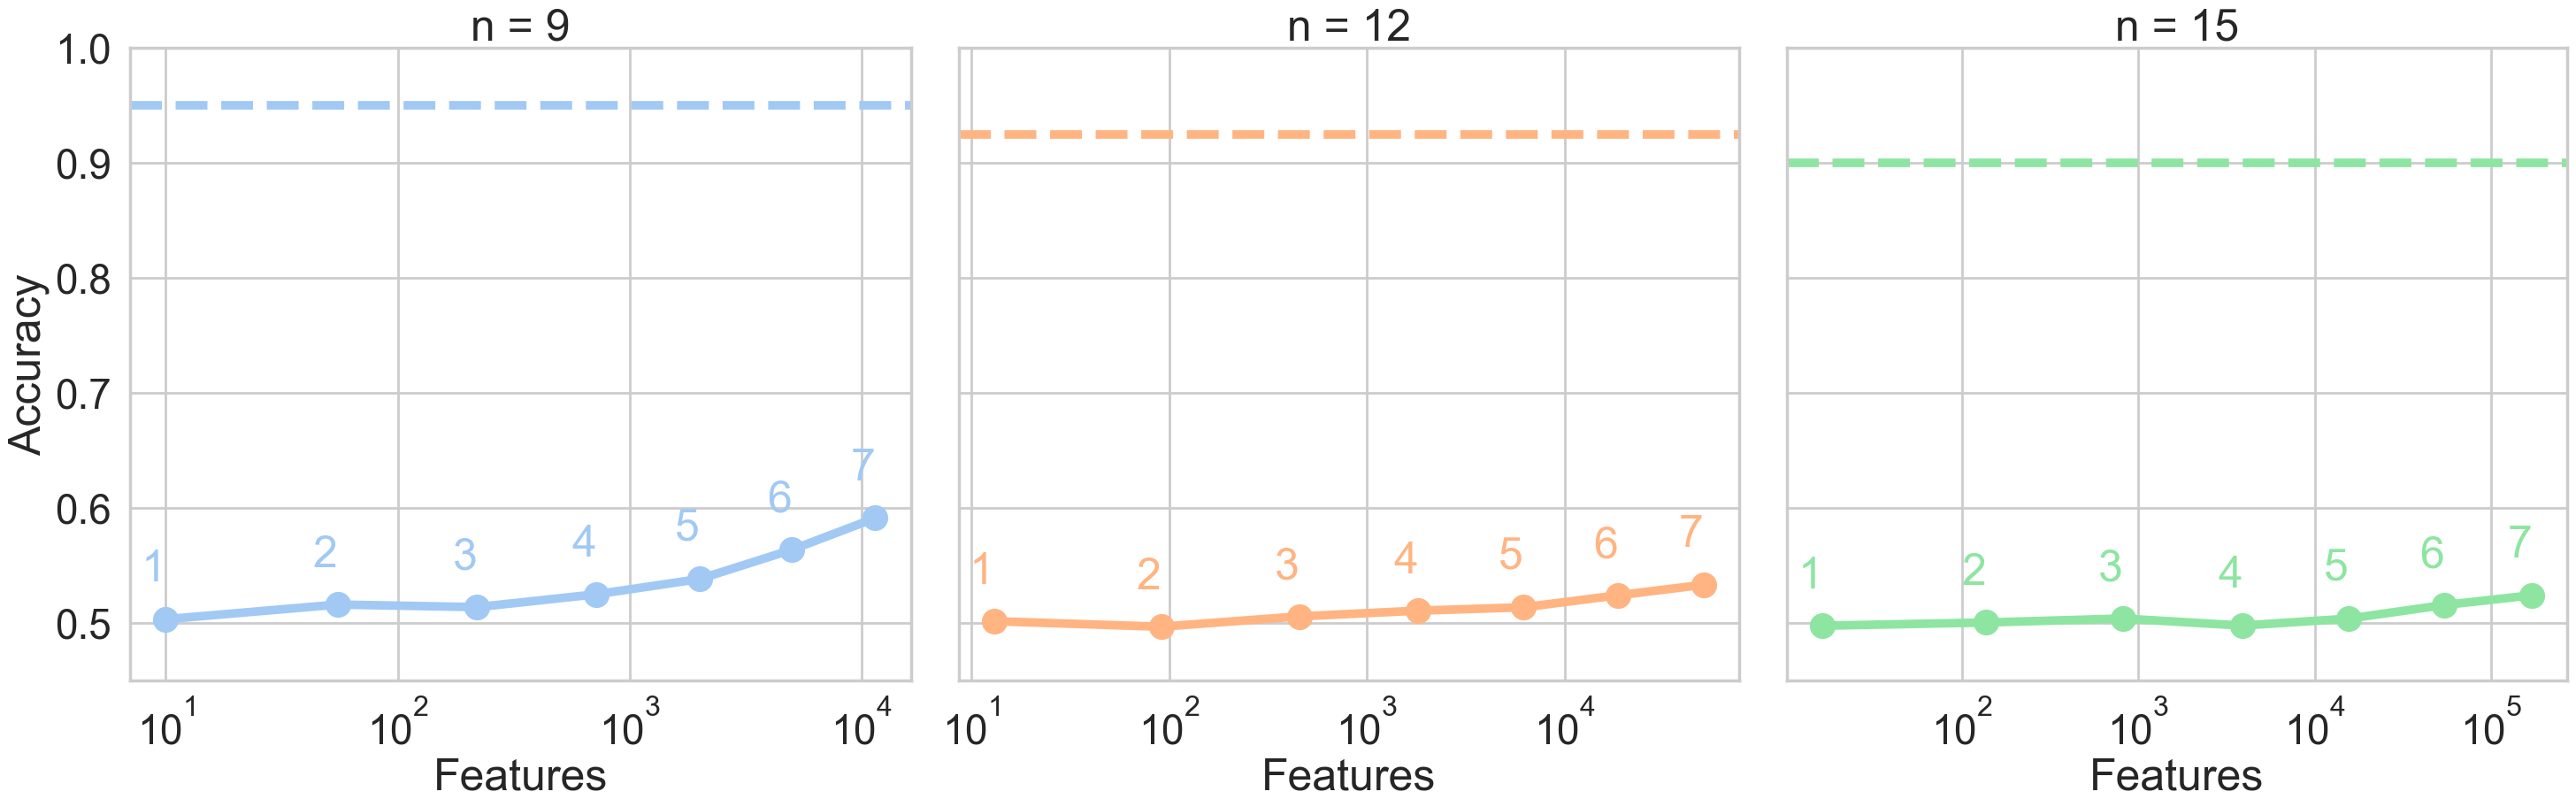

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
n_values = [9, 12, 15]
p_values = [1, 2, 3, 4, 5, 6, 7]

# Plot style
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=1.5)
colors = sns.color_palette("pastel", 3)  # Pastel color palette

success_hlines = [0.95, 0.925, 0.9]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharey=True)

# Plot each n-value in its own subplot
for i, (n, ax) in enumerate(zip(n_values, axes)):
    ax.plot(presolved_feat_by_n[i], presolved_acc_by_n[i], marker='o', label=f'n = {n}', color=colors[i],
           lw=7, markersize=20)
    
    # Annotating with p-values in the same color as the line
    for j, (x, y) in enumerate(zip(presolved_feat_by_n[i], presolved_acc_by_n[i])):
        ax.text(x, y+0.025, f'{p_values[j]}',  ha='right', va='bottom', color=colors[i])
    
    ax.axhline(success_hlines[i], color=colors[i], linestyle='--', lw=7)
    # Customizing each subplot
    ax.set_title(f'n = {n}')
    ax.set_xlabel("Features")
    if i == 0:
        ax.set_ylabel("Accuracy")
    ax.set_xscale('log')
    
# Adjust layout
plt.tight_layout()
plt.ylim((0.45, 1.0))

# Show the plot
plt.show()

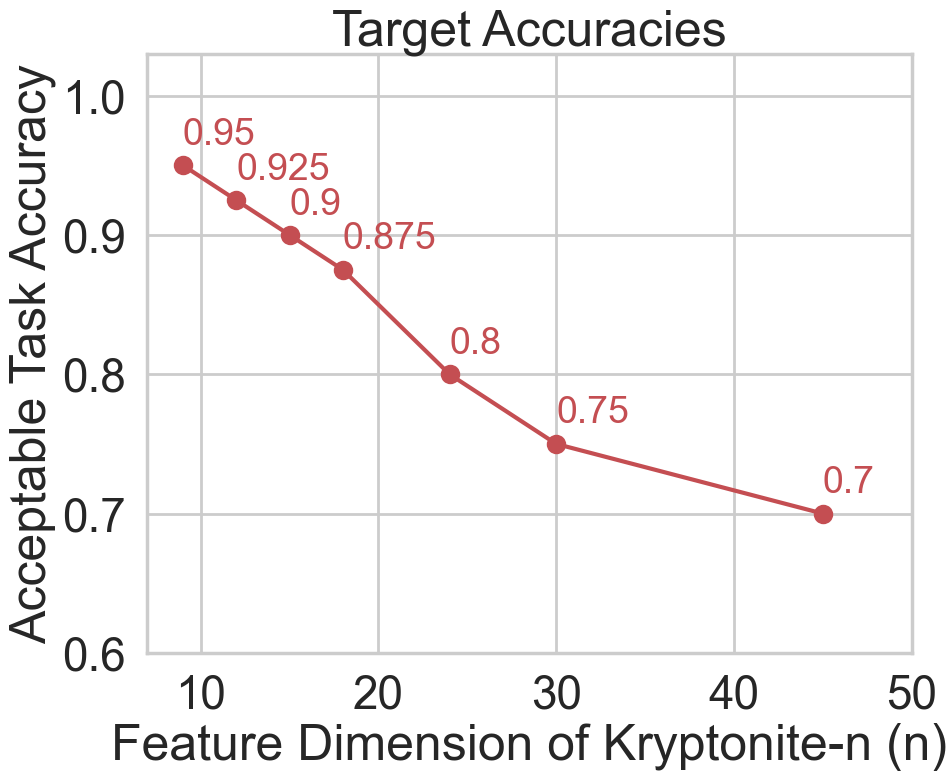

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data

# Plot style
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=1.5)
plt.figure(figsize=(10,8))

n = [9,12,15,18,24,30,45]
succ = [0.95, 0.925, 0.9, 0.875, 0.8, 0.75, 0.7]
plt.plot(n, succ, c='r')
plt.scatter(x=n, y=succ, c='r') 

ax = plt.gca()
# Annotating with p-values in the same color as the line
for j, (x, y) in enumerate(zip(n, succ)):
    ax.text(x, y+0.01, f'{succ[j]}',  ha='left', va='bottom', color='r', size=27)
        
# Adjust layout
plt.tight_layout()
plt.ylim((0.6, 1.03))
plt.xlim((7, 50))
# Show the plot

plt.title("Target Accuracies")
plt.ylabel("Acceptable Task Accuracy")
plt.xlabel("Feature Dimension of Kryptonite-n (n)")
plt.show()